In [1]:
import pandas as pd
import requests
import re
import matplotlib.pyplot  as plt

In [2]:
%ls

 驱动器 E 中的卷没有标签。
 卷的序列号是 0004-A5F2

 E:\Project\Jupyter\Lecture2 的目录

2018/11/21  10:52    <DIR>          .
2018/11/21  10:52    <DIR>          ..
2018/11/13  13:21    <DIR>          .ipynb_checkpoints
2018/11/13  13:32        40,993,671 80k (1).tar.gz
2018/11/12  10:42        96,815,910 80k_articles.txt
2018/11/21  10:52           242,144 ProbabilityBased.ipynb
               3 个文件    138,051,725 字节
               3 个目录 170,348,834,816 可用字节


In [3]:
filename = '80k_articles.txt'

In [4]:
all_content = open(filename,encoding='UTF-8').read()

In [5]:
all_content[:200]

'新华社照片，东莞（广东），2017年4月7日\\n（体育）（9）篮球——CBA总决赛第四场：广东对阵新疆\\n4月7日，广东东莞银行队球员易建联在比赛中扣篮。\\n当日，在2016-2017赛季中国男子篮球职业联赛（CBA）总决赛第四场比赛中，广东东莞银行队主场迎战新疆喀什古城队。\\n新华社记者孟永民摄\\n\u3000\u3000新华社北京４月１４日新媒体专电（记者杨烨）作为国民经济的重要支柱，央企一季度交上了一份漂亮的“'

In [6]:
ims = requests.get("http://movie.douban.com").text

In [7]:
ims

'<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n        豆瓣电影\n</title>\n    \n    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />\n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n    <meta http-equiv="mobile-agent" content="format=xhtml; url=http://m.douban.com/movie/">\n    <meta property="qc:admins" content="13753521351564752166375" />\n    \n    \n    <meta name="keywords" content="电影、经典电影、热映、电视剧、美剧、影评、电影院、电影票、排行、推荐"/>\n    <meta name="description" content="豆瓣电影提供最新的电影介绍及评论包括上映影片的影讯查询及购票服务。你可以记录想看、在看和看过的电影电视剧，顺便打分、写影评。根据你的口味，豆瓣电影会推荐好电影给你。" />\n\n    <link rel="apple-touch-icon" href="https://img3.dou

In [8]:
len(all_content)

34475997

In [9]:
def tokenize(string): 
    return ''.join(re.findall('[\w|\d]+', string))

In [10]:
all_character=tokenize(all_content)

## Unigram

## $P(W_0W_1W_2W_n)=P(W_0)·P(W_1)·P(W_2)·P(W_n)$

In [11]:
from collections import Counter

In [12]:
all_character_count=Counter(all_character)
print(all_character_count)

Counter({'的': 635684, 'n': 605563, '国': 303683, '1': 285430, '在': 273451, '一': 255874, '中': 249541, '日': 248419, '2': 247140, '新': 243975, '0': 240159, '年': 197627, '月': 183696, '人': 176780, '大': 162508, '社': 159861, '华': 156763, '是': 141034, '和': 131350, '赛': 130048, '发': 129080, '有': 128925, '为': 126278, '5': 124931, '了': 124569, '行': 122928, '7': 121544, '上': 118416, '外': 117495, '4': 112639, '业': 112051, '不': 112042, '会': 109898, '代': 100566, '地': 96026, '球': 92521, '时': 92322, '3': 92131, '者': 91667, '作': 91293, '以': 91191, '家': 89815, '成': 89485, '对': 87199, '6': 86963, '市': 85776, '来': 85467, '出': 85263, '生': 84895, '个': 83544, '这': 81872, '公': 81351, '比': 80433, '动': 80430, '线': 80196, '全': 79296, '体': 79271, '二': 79008, '进': 78995, '开': 78979, '１': 78756, '０': 75949, '多': 75399, '学': 73616, '队': 73414, '到': 73247, '斯': 72799, '法': 72555, '合': 72090, '展': 71993, '要': 71584, '场': 71047, '方': 70982, '部': 70644, '记': 69959, '工': 69432, '经': 67717, '分': 66855, '能': 65109, '区': 6496

In [13]:
M = all_character_count.most_common()[0][1]

In [14]:
from matplotlib.pyplot import yscale,xscale,title,plot

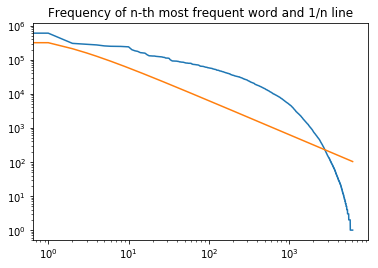

In [15]:
yscale('log');xscale('log');title('Frequency of n-th most frequent word and 1/n line')
plot([c for (w,c) in all_character_count.most_common()])
plot([M/i for i in range(1,len(all_character_count))])

In [16]:
def get_probablity_from_counts(count):
    all_occurance = sum(count.values())
    min_occurance = min(count.values())
    def get_prob(item):
        return count[item]/all_occurance
    return get_prob
    

In [17]:
get_char_prob = get_probablity_from_counts(all_character_count)

In [18]:
get_char_prob('我')

0.0016467963797115734

In [19]:
def get_char_probility(char):
    all_occurance = sum(all_character_count.values())
    return all_character_count[char]/all_occurance

In [20]:
get_char_probility('我')

0.0016467963797115734

## Compare get_char_prob with get_char_probility

In [21]:
import time

In [22]:
def get_running_time(func,arg,times):
    start_time = time.time()
    for _ in range(times):
        func(arg)
    print('{} use time : {}'.format(func.__name__,time.time()-start_time))

In [23]:
get_running_time(get_char_prob,'我',10000)
get_running_time(get_char_probility,'我',10000)

get_prob use time : 0.002000093460083008
get_char_probility use time : 0.6369998455047607


In [24]:
from functools import reduce
from operator import add,mul

In [25]:
def get_prob_of_string(string):
    return reduce(mul,[get_char_prob(e) for e in string ])

In [26]:
get_prob_of_string("这是一个常见的例子")

8.345623453407004e-25

In [27]:
get_prob_of_string("这是一个罕见的例子")

3.94664887647696e-26

In [28]:
pair = """前天晚上吃晚饭的时候
前天晚上吃早饭的时候""".split('\n')

pair2 = """正是一个好看的小猫
真是一个好看的小猫""".split('\n')

pair3 = """我无言以对，简直
我简直无言以对""".split('\n')

In [29]:
pair=[pair,pair2,pair3]

In [30]:
def compare_probabilty_of_pairs(language_model_func,pairs):
    for (p1,p2) in pairs:
        print("{} with probability {}".format(p1,language_model_func(tokenize(p1))))
        print("{} with probability {}".format(p2,language_model_func(tokenize(p2))))

In [50]:
def compare_probabilty_of_pairs2(language_model_func,word_prec_func,pairs):
    for (p1,p2) in pairs:
        print("{} with probability {}".format(p1,language_model_func(word_prec_func,tokenize(p1))))
        print("{} with probability {}".format(p2,language_model_func(word_prec_func,tokenize(p2))))

In [31]:
compare_probabilty_of_pairs(get_prob_of_string,pair)

前天晚上吃晚饭的时候 with probability 1.2205917468406523e-31
前天晚上吃早饭的时候 with probability 1.4203006420690778e-31
正是一个好看的小猫 with probability 3.2525875244545557e-25
真是一个好看的小猫 with probability 1.0219933874960867e-25
我无言以对，简直 with probability 3.7422941328709655e-22
我简直无言以对 with probability 3.7422941328709655e-22


## 2-Gram

$$Pr(w_0w_1w_2...w_n)=Pr(w_1|w_0) \cdot Pr(w_2|w_1) ... \cdot Pr(w_n|w_{n-1})$$

$$Pr(w_1|w_0)=\frac{Pr(w_1w_0)}{Pr(w_0)}$$

In [32]:
all_character[:100]

'新华社照片东莞广东2017年4月7日n体育9篮球CBA总决赛第四场广东对阵新疆n4月7日广东东莞银行队球员易建联在比赛中扣篮n当日在20162017赛季中国男子篮球职业联赛CBA总决赛第四场比赛中广东'

In [33]:
gram_length=2

In [34]:
two_gram_count = Counter(all_character[i:i+gram_length] for i in  range(len(all_character)-gram_length))

In [35]:
get_pair_prob = get_probablity_from_counts(two_gram_count)

In [36]:
get_pair_prob('你好')

2.825039929753364e-06

In [51]:
def get_2_gram_prob(word,prev):
    if get_pair_prob(prev+word)>0:
        return get_pair_prob(prev+word)/get_char_prob(prev)
    else:
        return get_char_prob(word)

def get_2_gram_prob_word_prev(word,prev):
    if get_pair_prob(word+prev)>0:
        return get_pair_prob(word+prev)/get_char_prob(prev)
    else:
        return get_char_prob(word)

In [52]:
def get_2_gram_string_prob(func,string):
    probabilities = []
    for i,c in enumerate(string):
        prev = '<s>' if i==0 else string[i-1]
        probabilities.append(func(c,prev))
    return reduce(mul,probabilities)

In [56]:
compare_probabilty_of_pairs2(get_2_gram_string_prob,get_2_gram_prob,pair)

前天晚上吃晚饭的时候 with probability 1.492144063494799e-22
前天晚上吃早饭的时候 with probability 3.809830650788852e-22
正是一个好看的小猫 with probability 1.355542594848077e-19
真是一个好看的小猫 with probability 2.912652861792522e-20
我无言以对，简直 with probability 3.5305462460849376e-20
我简直无言以对 with probability 3.4139699174104825e-20


In [57]:
compare_probabilty_of_pairs2(get_2_gram_string_prob,get_2_gram_prob_word_prev,pair)

前天晚上吃晚饭的时候 with probability 7.64024221487023e-30
前天晚上吃早饭的时候 with probability 3.2829727436258485e-30
正是一个好看的小猫 with probability 2.6010618353203228e-25
真是一个好看的小猫 with probability 3.7604498626917853e-25
我无言以对，简直 with probability 3.503287509194051e-24
我简直无言以对 with probability 2.0530964727174864e-22


In [58]:
compare_probabilty_of_pairs(get_prob_of_string,pair)

前天晚上吃晚饭的时候 with probability 1.2205917468406523e-31
前天晚上吃早饭的时候 with probability 1.4203006420690778e-31
正是一个好看的小猫 with probability 3.2525875244545557e-25
真是一个好看的小猫 with probability 1.0219933874960867e-25
我无言以对，简直 with probability 3.7422941328709655e-22
我简直无言以对 with probability 3.7422941328709655e-22
